In part 1 of this notebook, a regression model will be built using Keras deep learning framework to predict the compressive strength of concrete, based on its ingredients. The model will be trained several times with different network properties such as the number of epochs and hidden layers, to increase the model accuracy.

<h2><center> Building a Concrete Compressive Strength Model using Keras Framework </center></h2>



<strong>Concrete Ingredients:</strong>
<ol type="1">
  <li>Cement</li>
  <li>Blast Furnace Slag</li>
  <li>Fly Ash</li>
  <li>Water</li>
  <li>Superplasticizer</li>
  <li>Coarse Aggregate</li>
  <li>Fine Aggregate</li>
  <li>Age</li>
</ol>

### 1. OBTAIN - Obtain Data from its Source.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Let's check the shape of the dataframe:

In [ ]:
df.shape

(1030, 9)

It has 1030 rows and 9 columns.

### 2. SCRUB - Clean / Preprocess Data to Format that Machine Understand.

In [ ]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
df.dtypes

,0
Cement,float64
Blast Furnace Slag,float64
Fly Ash,float64
Water,float64
Superplasticizer,float64
Coarse Aggregate,float64
Fine Aggregate,float64
Age,int64
Strength,float64


The data looks very clean; no missing data and all data is in numerical form.

Nothing much here, lets move to our next step!

### 3. EXPLORE - Find Significant Patterns and Trends using Statistical Method.

In [ ]:
df.describe() #shape of the data(mean and median),spread(std),min,max,range

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.corr(numeric_only=True)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


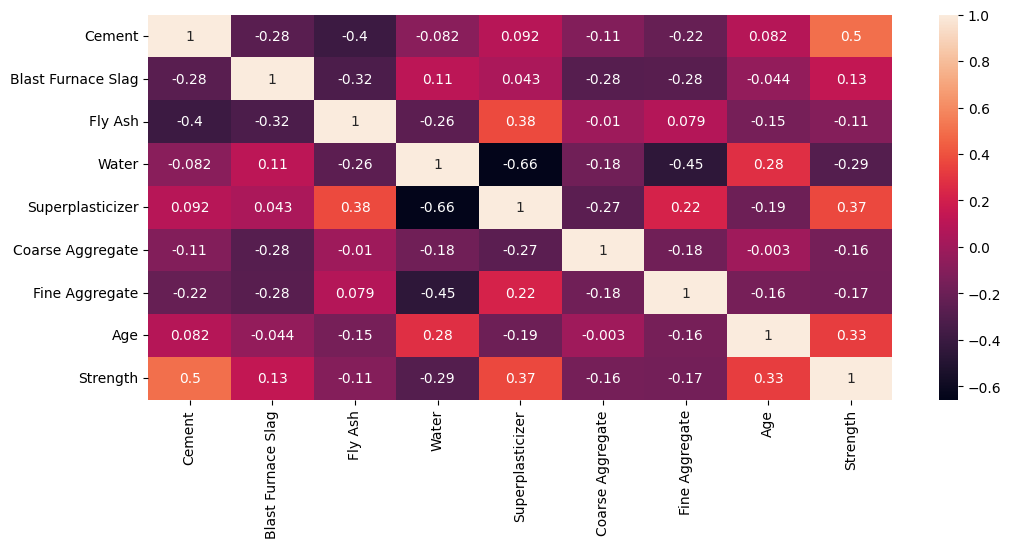

In [ ]:
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

As our objective is mainly to build the model, we will just touch a few in this EDA (exploratory data analysis) section.

### 4. MODEL - Construct Model to Predict and Forecast.

The part where the magic happens.

#### Split Data to Predictors and Target

In [ ]:
X = df.iloc[:,:-1]
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
y = df.iloc[:,-1]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Save number of feature columns, <strong><i>n_cols</i></strong> to use later in model development.

In [ ]:
y=df[["Strength"]]
X=df.drop("Strength",axis=1)

In [ ]:
n_cols = X.shape[1]
n_cols

8

#### Importing SKLEARN and KERAS Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential #model name
from keras.layers import Dense #neurons

### Building the Model

<strong><font color="red">A. BASELINE MODEL</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layer: 1</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 50</li>
</ul>

In [ ]:
mse_A = []
r2_A = []

for i in range(50):

    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50)

    #predict output on test set
    y_pred = model.predict(X_test)

    mse_A.append(mean_squared_error(y_test, y_pred))
    r2_A.append(r2_score(y_test, y_pred))

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 2ms/step - loss: 162.3295
Epoch 27/50
23/23 [==============================] - 0s 2ms/step - loss: 159.0281
Epoch 28/50
23/23 [==============================] - 0s 2ms/step - loss: 157.2199
Epoch 29/50
23/23 [==============================] - 0s 2ms/step - loss: 154.4418
Epoch 30/50
23/23 [==============================] - 0s 2ms/step - loss: 151.7805
Epoch 31/50
23/23 [==============================] - 0s 2ms/step - loss: 153.6611
Epoch 32/50
23/23 [==============================] - 0s 2ms/step - loss: 153.2788
Epoch 33/50
23/23 [==============================] - 0s 2ms/step - loss: 147.1129
Epoch 34/50
23/23 [==============================] - 0s 2ms/step - loss: 146.0408
Epoch 35/50
23/23 [==============================] - 0s 2ms/step - loss: 144.7949
Epoch 36/50
23/23 [==============================] - 0s 2ms/step - loss: 145.1810
Epoch 37/50
23/23 [==============================] - 0s 2ms

In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_A)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_A)))

mse_Mean: 297.05
mse_StdDev: 346.10


In [ ]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_A)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_A)))

R^2_Mean: -0.08
R^2_StdDev: 1.27


<strong><font color="red">B. MODEL WITH NORMALIZED DATA</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layer: 1</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 50</li>
</ul>

Model is retrain with normalized data.

In [ ]:
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [ ]:
mse_B = []
r2_B = []

for i in range(50):

    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)

    mse_B.append(mean_squared_error(y_test, y_pred))
    r2_B.append(r2_score(y_test, y_pred))

10/10 [==============================] - 0s 3ms/step


In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_B)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_B)))

mse_Mean: 362.63
mse_StdDev: 89.94


In [ ]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_B)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_B)))

R^2_Mean: -0.30
R^2_StdDev: 0.34


<strong><font color="red">C. MODEL WITH 100 EPOCHS</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layer: 1</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 100</li>
</ul>

Model is retrained with 100 epochs.

In [ ]:
mse_C = []
r2_C = []

for i in range(50):

    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)

    mse_C.append(mean_squared_error(y_test, y_pred))
    r2_C.append(r2_score(y_test, y_pred))

10/10 [==============================] - 0s 6ms/step


In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_C)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_C)))

mse_Mean: 168.65
mse_StdDev: 18.81


In [ ]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_C)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_C)))

R^2_Mean: 0.39
R^2_StdDev: 0.07


<strong><font color="red">D. MODEL WITH 3 HIDDEN LAYERS</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layers: 3</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 100</li>
</ul>

Model is retrained with 3 hidden layers.

In [ ]:
mse_D = []
r2_D = []

for i in range(50):

    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)

    mse_D.append(mean_squared_error(y_test, y_pred))
    r2_D.append(r2_score(y_test, y_pred))

10/10 [==============================] - 0s 11ms/step


In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_D)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_D)))

mse_Mean: 85.70
mse_StdDev: 25.36


In [ ]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_D)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_D)))

R^2_Mean: 0.69
R^2_StdDev: 0.10


### 5. iNTERPRET - Analyze and Interpret Model

#### Comparing all evaluation metrics

In [ ]:
from IPython.display import HTML, display
import tabulate

tabletest = [['STEPS','MSE: Mean','MSE: StdDev','R^2: Mean','R^2: StdDev'],
         ['A', round(np.mean(mse_A),2), round(np.std(mse_A),2), round(np.mean(r2_A),2), round(np.std(r2_A),2)],
         ['B', round(np.mean(mse_B),2), round(np.std(mse_B),2), round(np.mean(r2_B),2), round(np.std(r2_B),2)],
         ['C', round(np.mean(mse_C),2), round(np.std(mse_C),2), round(np.mean(r2_C),2), round(np.std(r2_C),2)],
         ['D', round(np.mean(mse_D),2), round(np.std(mse_D),2), round(np.mean(r2_D),2), round(np.std(r2_D),2)]]

display(HTML(tabulate.tabulate(tabletest, tablefmt='html')))

STEPS,MSE: Mean,MSE: StdDev,R^2: Mean,R^2: StdDev
A,297.05,346.1,-0.08,1.27
B,362.63,89.94,-0.3,0.34
C,168.65,18.81,0.39,0.07
D,85.7,25.36,0.69,0.1


<strong>From the results above, we can clearly see that by applying:</strong>
<ul>
  <li>Data Normalization,</li>
  <li>Increasing Epochs,</li>
  <li>and Increasing Hidden Layers</li>
</ul>

<strong>the mean of MSE has gone down, while the mean of R^2 has gone up indicating that the model accuracy is getting better.</strong>